In [204]:
include("model.jl")
include("Parser.jl")
include("proximal.jl")
include("tabu.jl")
include("utils.jl")

using JuMP

In [205]:
data, x_VC, y_VC, x_loc, y_loc, R = parse_to_struct("./Instances/coord50-5-2_processed.dat")

(OptVaxData(50, 5, [0.0 7.211102550927978 … 8.06225774829855 6.4031242374328485; 7.211102550927978 0.0 … 13.0 1.0; … ; 8.06225774829855 13.0 … 0.0 12.0; 6.4031242374328485 1.0 … 12.0 0.0], [0 0 … 0 0; 0 0 … 0 0; … ; 1 1 … 0 0; 1 1 … 0 0], 70, [350, 350, 350, 350, 350], [14, 19, 18, 17, 13, 17, 16, 16, 12, 18  …  13, 18, 14, 18, 16, 12, 12, 14, 14, 16], [12318, 11308, 8938, 14703, 9073], 1000, 18444.994424751003, [42, 41, 37, 6, 25], 5), [42.0, 47.0, 47.0, 7.0, 19.0], [4.0, 20.0, 49.0, 18.0, 18.0], [14.0, 20.0, 26.0, 17.0, 13.0, 12.0, 4.0, 21.0, 1.0, 2.0  …  37.0, 35.0, 42.0, 25.0, 39.0, 48.0, 41.0, 35.0, 41.0, 37.0], [14.0, 18.0, 1.0, 4.0, 3.0, 4.0, 10.0, 21.0, 19.0, 22.0  …  26.0, 48.0, 35.0, 40.0, 41.0, 41.0, 26.0, 27.0, 31.0, 31.0], [8.509262392499917, 12.273554630314973, 17.435507895829222, 13.559429077507767, 11.15512985522207])

In [206]:
(best_VC, best_MMTs, best_cost, best_Q) = tabu_search(data, alpha = .1)

Is feasible: true

(5, [[(55, 6), (6, 25), (25, 37), (37, 42), (42, 55)], [(55, 41), (41, 49), (49, 39), (39, 48), (48, 55)], [(55, 28), (28, 32), (32, 31), (31, 38), (38, 55)], [(55, 50), (50, 43), (43, 29), (29, 36), (36, 35), (35, 55)], [(55, 44), (44, 40), (40, 34), (34, 26), (26, 55)]], 73.33140651082641, 497.0)

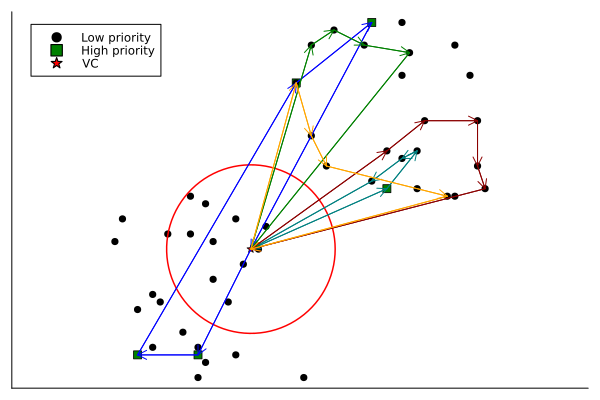

In [207]:
plot_solution_greedy(best_MMTs, x_VC, y_VC, x_loc, y_loc, R, data)

In [ ]:
println("====================================")
println("z_low = ", best_Q)
println("====================================")

z_star = 256.0


In [39]:
z_dual = proximal_gradient_descent(
                    best_Q,
                    data,
                    50,)

Proximal gradient descent   6%|█▌                        |  ETA: 0:01:02

InterruptException: InterruptException:

In [9]:
println("====================================")
println("z_dual = ", z_dual)
println("====================================")

z_dual = 286.002720578172
